Votre solution est mieux que la solution.

## Labo_5 - ISD - Alexis Martins & Arnaud Monition

## Fonctions et imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sklearn.metrics as sk
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_boston
import warnings

from random import randrange
import random
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Initialisation d'un seed aléatoire
random.seed()

#-------------------------------------
#              Partie 1
#-------------------------------------

#Fonction d'affichage de l'histogram
def plot_histogram(data, myTitle, myXlabel, myYlabel):
    ax = plt.axes()
    ax.set_facecolor(('#B5B2B2'))
    data.hist(alpha=0.5, figsize=(18, 10),color="#000080", edgecolor="black")
    plt.title(myTitle,fontsize=18)
    plt.xlabel(myXlabel,fontsize=15)
    plt.ylabel(myYlabel,fontsize=15)
    plt.grid(False)
    plt.show()
       
def plot_scatter(dataXscatter, dataYscatter,dataXplot, dataYplot , myTitle, myXlabel, myYlabel, r_sqr):
    fig, ax = plt.subplots(figsize=(18, 10))
    ax.set_facecolor(('#B5B2B2'))
    ax.scatter(dataXscatter, dataYscatter, color="#000080", alpha=0.5)
    ax.plot(dataXplot, dataYplot, color="red")
    ax.set_title(myTitle)
    ax.set_xlabel(myXlabel)
    ax.set_ylabel(myYlabel)
   
    t = plt.text(0.04, 0.93, 'R² = ' + str(r_sqr), transform=ax.transAxes, fontsize=20)
    t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='black'))
    plt.show()
    
def compute_MSE(b,m,data):
    totalError = 0   # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError / float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
    return [b, m]

# Evaluation Hold-Out
# Split a dataset into a train and test set
def trainTestSplit(dataset,split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

def sum_covariance(data):
    sum = 0
    y_mean = np.mean(data, axis=1)[1]
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        sum += (y - y_mean) ** 2
    return sum

# Calculate R² metric based on the testset
def calculerRCarre(b, m, testset):
    sum_error = compute_MSE(b, m, np.array(testset)) * len(testset)
    sum_cov   = sum_covariance(np.array(testset))
    return 1 - (sum_error / sum_cov)

def calculerPerformance(N,b,m,data):
    assert N > 0

    scores = list()
    for _ in range(N):
        # Collecter les données
        dataset, testset = trainTestSplit(data.tolist(), 0.80)
        scores.append(calculerRCarre(b,m,data))

    moyenne = np.mean(scores)
    meilleur = np.max(scores)
    pire = np.min(scores)
    return [moyenne, meilleur, pire]



#-------------------------------------
#              Partie 2
#-------------------------------------

def calculate_metrics(couple_of_variables, N):

    mean_coef = []
    mean_intercept = []
    mean_score = []

    
    for i in range(N):
        data = boston_df[couple_of_variables + ['MEDV']]
        x = data.drop('MEDV', axis=1)
        y = data['MEDV']

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

        LR = LinearRegression()
        LR.fit(x_train,y_train)
        y_prediction =  LR.predict(x_test)

        mean_coef.append(LR.coef_)
        mean_intercept.append(LR.intercept_)
        # predicting the accuracy score
        mean_score.append(r2_score(y_test,y_prediction))
        
        
    coef = np.round(np.mean(mean_coef, axis=0),2)
    intercept = np.round(np.mean(mean_intercept, axis=0),2)
    score = np.round(np.mean(mean_score, axis=0),2)
    
    print("Variables :", couple_of_variables[0], "et", couple_of_variables[1] ,"--> MEDV")
    print("Score R² :", score)
    print("coefficient des variables :", couple_of_variables[0],"=", coef[0], couple_of_variables[1] ,"=", coef[1])
    print("Ordonnée à l'origine :", intercept)
    print("Équation finale : y = (", coef[0], "*", couple_of_variables[0] ,") + (",coef[1], "*", couple_of_variables[1] ,") + (",intercept,")\n")
    
    return y, y_test, y_prediction, score

## Exercie 1

### Régression linéaire simple

#### Exercice 1.1)
Installez la bibliothèque `sklearn`

In [3]:
try:
    import sklearn
    print("Import de la bibliothèque réalisé avec succès")
except ImportError as error:
    print(error,':( not found')

Import de la bibliothèque réalisé avec succès


#### Exercice 1.2)
Créez un notebook pour lire la base de données «Boston housing dataset » et
générez un dataframe.

In [4]:
#Ajout d'un catch_warnings pour masquer l'erreur "dataset has an ethical problem"
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    bd = load_boston()
    
#Changement des nom de columns
boston_df = pd.DataFrame(bd.data, columns=bd.feature_names)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### Exercice 1.3)
Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).

In [5]:
#Infos du dataframe
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


##### Analyse de la commande .info:
Avec cette commande, on peut se rendre compte que pour chaque colonne, on a le même nombre de "non-null". Ce même nombre concorde avec le nombre total de lignes du dataframe, soit 506. 
Nous pouvons en conclure qu'il n'y a **aucune valeur manquante.** 

In [6]:
# Affichage de la description du dataframe
print(bd.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

##### Analyse du print:
Avec cette commande, on retrouve plusieurs informations comme par exemple la définition des abréviation des colonnes, qui nous donne un ordre d'idée de ce que valent les valeurs de chaque colonne.
Pour exemple, LSTAT est un pourcentage. On peut donc affirmer que toutes les valeurs doivent être comprise entre 0 et 100.

La ligne "Missing Attribute Values: None" indique qu'aucune valeur est à `None`, ce qui correspond avec l'observation faite plus haut. 

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


##### Analyse de la commande .describe:
On retrouve divers informations statistiques sur les colonnes de notre dataframe qui pouront nous être utilies dans la suite du laboratoire.

#### Exercice 1.3)
Générez un histogramme de la distribution de la variable indépendente.

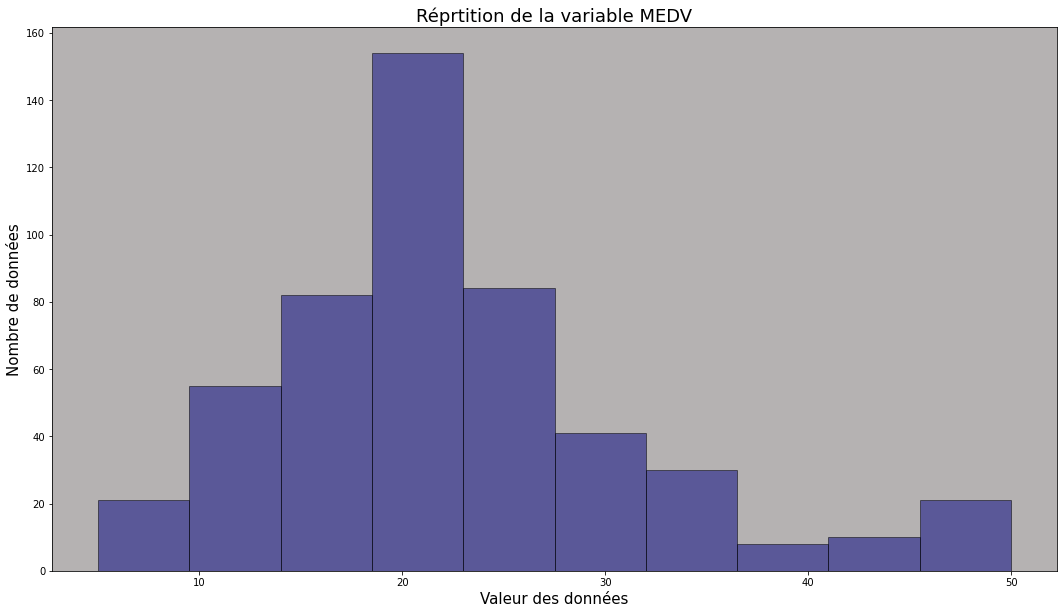

In [8]:
# Il faut renommmer la dernière colonne
boston_df['MEDV'] = pd.Series(bd.target)

# Affichage du dataframe
plot_histogram(boston_df['MEDV'], 
               "Réprtition de la variable MEDV", 
               "Valeur des données", 
               "Nombre de données")

#### Exercice 1.4)
Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE. <br>
Commentez vos observations.

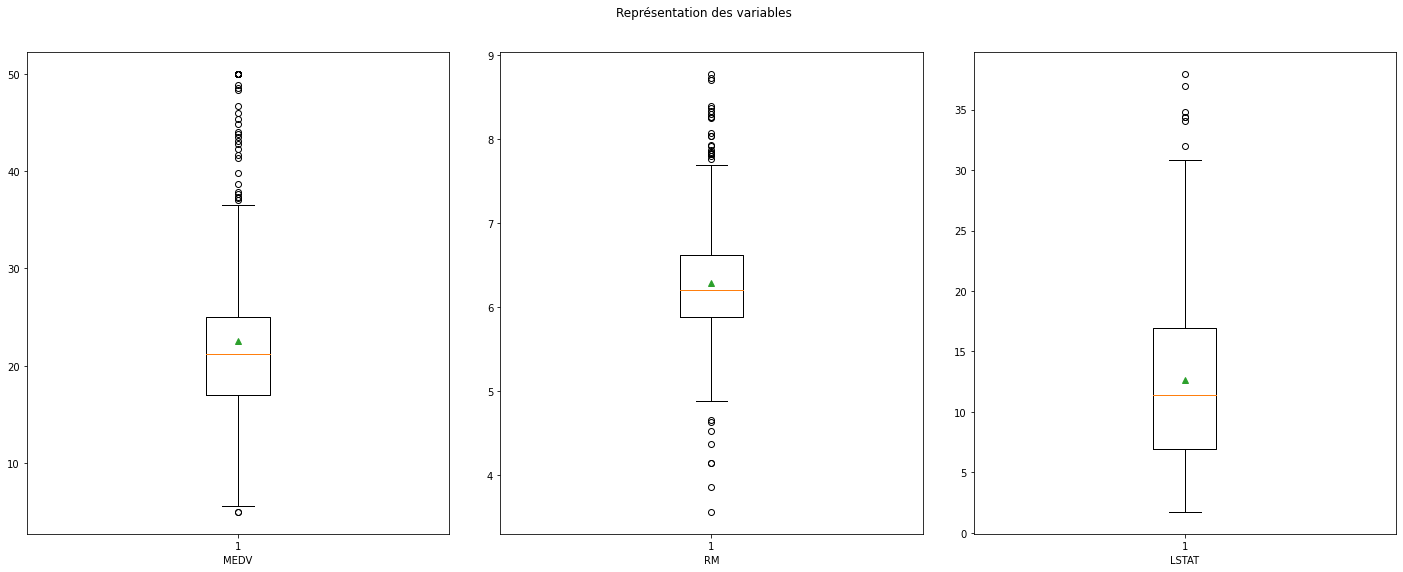

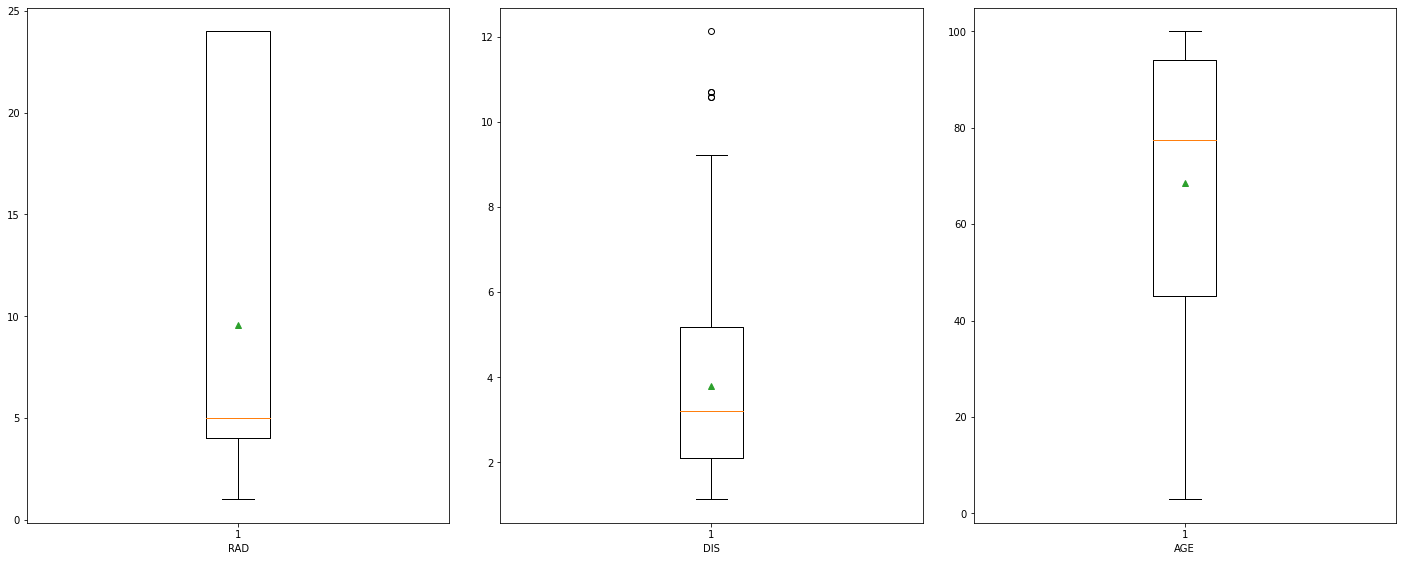

In [9]:
column = ['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']
for c in range(0, len(column), 3):
    fig,ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(20, 8))
    if c <= 0:
        fig.suptitle('Représentation des variables')
    plt.tight_layout(pad=2)
    for x in range(0,3):
        #On affiche 3x3 donc si il n'y a pas un multiple de 3 graphes, on cache les non utilisés.
        if (c+x >= len(column)) :
            ax[x].set_visible(False)
        else:
            ax[x].boxplot(boston_df[column[c+x]], showmeans=True)
            ax[x].set_xlabel(column[c+x])


##### Analyse des boîtes à moustaches:

À l'aide de ces boîtes à moustaches, on peut se rendre compte que visuellement les valeurs de MEDV risque d'être assez mal interprétées. On remarque un grand nombre de valeurs flotantes en dehors du max. Instinctivement on peut imaginer qu'un grand nombre de données sont décalée par rapport à notre boîte, mais si nous nous référons à l'histogramme réalisé au point 3, on comprend plus facilement la répartition des valeurs. 

#### Exercice 1.5)
Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT,chaque fois utilisant seulement une des variables. <br>
Programmez les fonctions pour faire une validation hold-out (e.g., 80% train +20% t est x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer la performance moyenne du modèle.

Démarrage du gradient descendant à 
 - b =     0.947 
 - m =     0.419 
 - error = 0.632
Après 1000 epochs: 
 -  b =     0.311 
 -  m =     0.166 
 -  error = 0.036


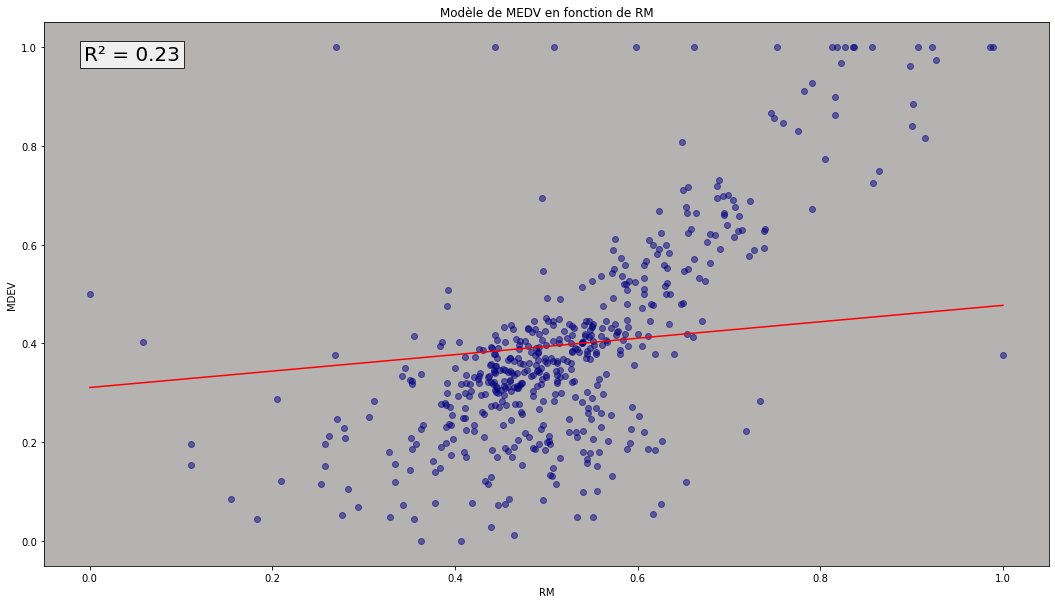

Démarrage du gradient descendant à 
 - b =     0.947 
 - m =     0.419 
 - error = 0.6
Après 1000 epochs: 
 -  b =     0.386 
 -  m =     -0.013 
 -  error = 0.041


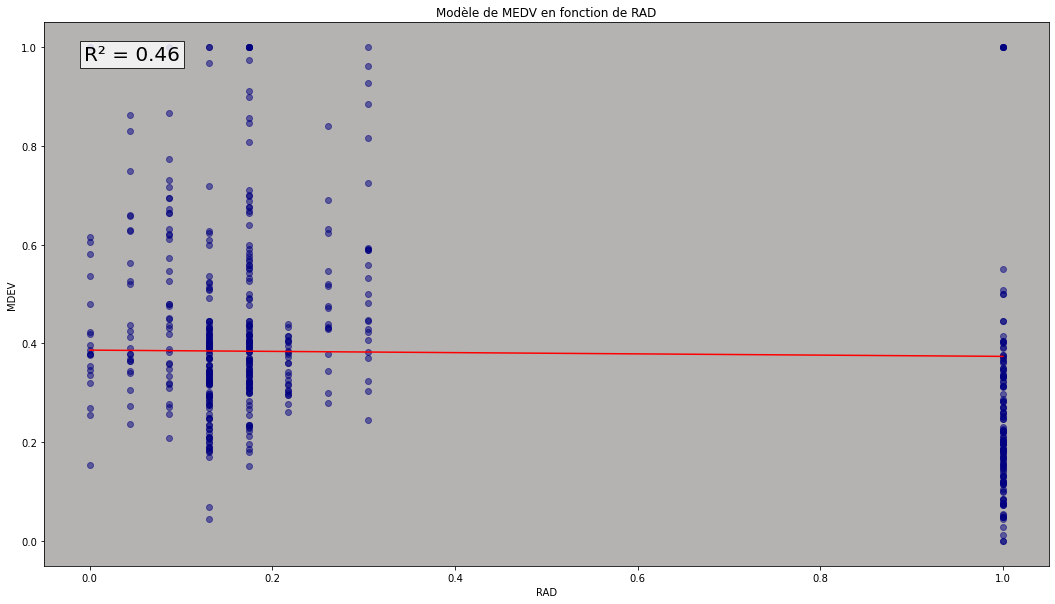

Démarrage du gradient descendant à 
 - b =     0.947 
 - m =     0.419 
 - error = 0.541
Après 1000 epochs: 
 -  b =     0.365 
 -  m =     0.062 
 -  error = 0.046


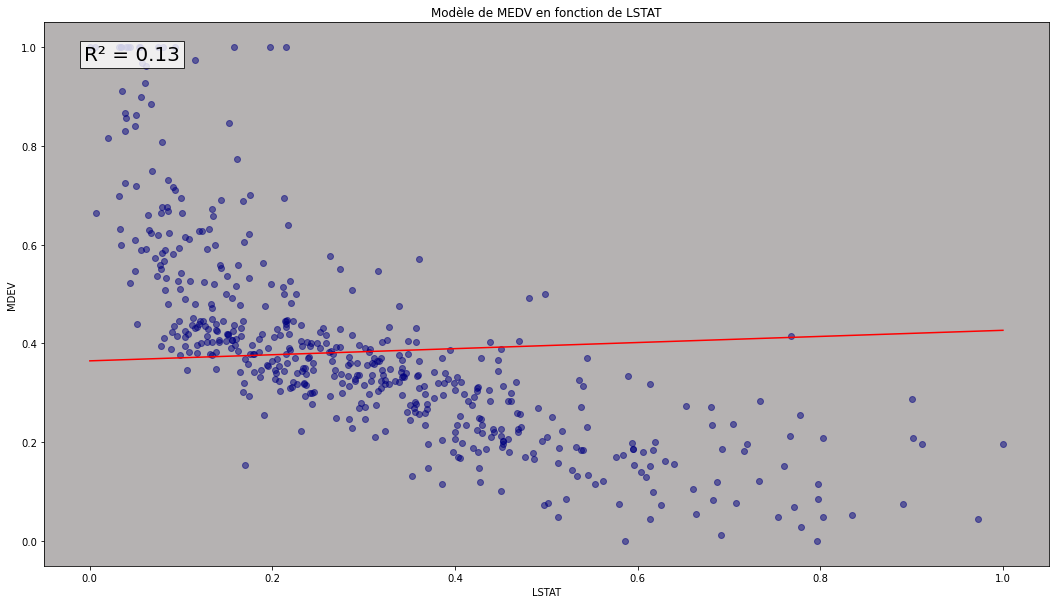

In [10]:
#Pour des résultats optimaux, les hyper-paramètres doivent être définis comme tel (l'opération prend du temps):
# lrate = 0.05
# n_epochs = 2000
#hyper-paramètre graphique
lrate = 0.005
n_epochs = 1000

N = 100
#On initialise la valeur de m et de b
initial_b = np.random.rand(1)  # intercept
initial_m = np.random.rand(1)  # pente
for col in ['RM', 'RAD', 'LSTAT']:
    # Collecter les données

    data = boston_df[[col, 'MEDV']].values
    scaller = MinMaxScaler()
    scaller.fit(data)
    data = scaller.transform(data)
    # On applique la méthode du gradient descendant
    print("Démarrage du gradient descendant à \n - b =     {0} \n - m =     {1} \n - error = {2}"
          .format(float("{:.3f}".format(min(initial_b))), 
                  float("{:.3f}".format(min(initial_m))), 
                  float("{:.3f}".format(min(compute_MSE(initial_b, initial_m, data))))))
    [b, m] = gradient_descent(data, initial_b, initial_m, lrate, n_epochs)
    [moyenne, meilleur, pire] = calculerPerformance(N, b, m, data)
    print("Après {0} epochs: \n -  b =     {1} \n -  m =     {2} \n -  error = {3}"
          .format(n_epochs, 
                  float("{:.3f}".format(min(b))), 
                  float("{:.3f}".format(min(m))), 
                  float("{:.3f}".format(min(compute_MSE(b, m, data))))))
    # Plot du graphique
    x = np.linspace(min(data[:, 0]), max(data[:, 0]))
    myTitle = 'Modèle de MEDV en fonction de ' + str(col)
    myXlabel = col
    myYlabel = 'MDEV'
    plot_scatter(data[:, 0], data[:, 1],x, (m*x + b) , myTitle, myXlabel, myYlabel,round(moyenne, 2))

##### Analyse de l'algorithme de régression linéaire: 


Nous pouvons constater qu'avec des valeurs prédéfinies le modèle (la droite) ne suit pas exactement la représentation (les points). Cela est dû au fait que nous utilisons les hyper-paramètres "par défaut" (donnés sur Teams). <br>
Le calcule de R² affiche des valeurs plûtot correcte (entre 0 et 1) mais on se rend bien compte que ce n'est pas idéal (comme pour le LSTAT qui tourne autour des 0.08). Il nous est arrivé d'avoir des R² négatif. Normalement il est comprise entre 0 et 1. Mais il peut arriver que si les données prédites sont très loin des valeurs réelles alors le R2 soit plus petit que 0... mais il ne peut en aucun cas être supérieur à 1.

#### Exercice 1.6)
Explorez les hyper paramètres : learning_rate et nombre d’epochs d’entraînement. <br>
Calculez la performance moyenne (c.a .d., la moyenne de x100 fois le coefficient de détermination calculé sur le test set) du meilleur modèle trouvé par validation hold out. Indiquez la valeur des hyper paramètres qui donnent les meilleurs résultats et la meilleure performance trouvée. <br>
Générez un scatter plot affichant les données (variable indépendante, variable dépendante)

In [11]:
#hyper-paramètre graphique
lrate = [0.001, 0.005,0.0075, 0.01, 0.05, 0.5]
n_epochs = [10,100,1000,2000]
N = 100
#On initialise la valeur de m et de b
initial_b = np.random.rand(1)  # intercept
initial_m = np.random.rand(1)  # pente
for rate in lrate:
    for epoch in n_epochs:
        print("Pour lrate =",rate, "et n_epochs =",epoch,)
        for col in ['RM', 'RAD', 'LSTAT']:
            # Collecter les données
            data = boston_df[[col, 'MEDV']].values
            scaller = MinMaxScaler()
            scaller.fit(data)
            data = scaller.transform(data)
            [b, m] = gradient_descent(data, initial_b, initial_m, rate, epoch)
            [moyenne, meilleur, pire] = calculerPerformance(N, b, m, data)
            print('%8s moyenne de R² = %5s' % (col, round(moyenne, 2)))
            


Pour lrate = 0.001 et n_epochs = 10
      RM moyenne de R² = -1.73
     RAD moyenne de R² = -0.71
   LSTAT moyenne de R² = -1.38
Pour lrate = 0.001 et n_epochs = 100
      RM moyenne de R² = -1.36
     RAD moyenne de R² = -0.49
   LSTAT moyenne de R² =  -1.1
Pour lrate = 0.001 et n_epochs = 1000
      RM moyenne de R² = -0.05
     RAD moyenne de R² =  0.35
   LSTAT moyenne de R² =  0.03
Pour lrate = 0.001 et n_epochs = 2000
      RM moyenne de R² =   0.1
     RAD moyenne de R² =  0.47
   LSTAT moyenne de R² =  0.22
Pour lrate = 0.005 et n_epochs = 10
      RM moyenne de R² = -1.56
     RAD moyenne de R² = -0.61
   LSTAT moyenne de R² = -1.25
Pour lrate = 0.005 et n_epochs = 100
      RM moyenne de R² = -0.43
     RAD moyenne de R² =  0.09
   LSTAT moyenne de R² = -0.33
Pour lrate = 0.005 et n_epochs = 1000
      RM moyenne de R² =  0.14
     RAD moyenne de R² =  0.51
   LSTAT moyenne de R² =  0.32
Pour lrate = 0.005 et n_epochs = 2000
      RM moyenne de R² =  0.19
     RAD moyenne de 

 Les listes `lrate` et `n_epochs` ont été choisies aléatoirement, après quelques tests manuels, afin d'éviter les runtime error.
 Si on veut éviter de perdre 20 minutes de compilation, il faut simplement réduire le nomdre d'époques.
 
 On costat déjà que plus l'époques est grande, plus les valeurs ont un sens, pareil pour le lrate. En gardant des petites valeurs, on peut s'appercevoir que pour un  lrate =  0.0075  et n_epochs =  2000 on a des bonne valeurs de R². Mais si on veut prendre les meilleures qui ont été testées, il faut prendre la dernière avec pour lrate =  0.5  et n_epochs =  2000. Ce qui nous donne: 
- RM moyenne de R² =  0.54
- RAD moyenne de R² =  0.53
- LSTAT moyenne de R² =  0.64

Démarrage du gradient descendant à 
 - b =     0.909 
 - m =     0.878 
 - error = 0.978
Après 2000 epochs: 
 -  b =     -0.087 
 -  m =     0.915 
 -  error = 0.022


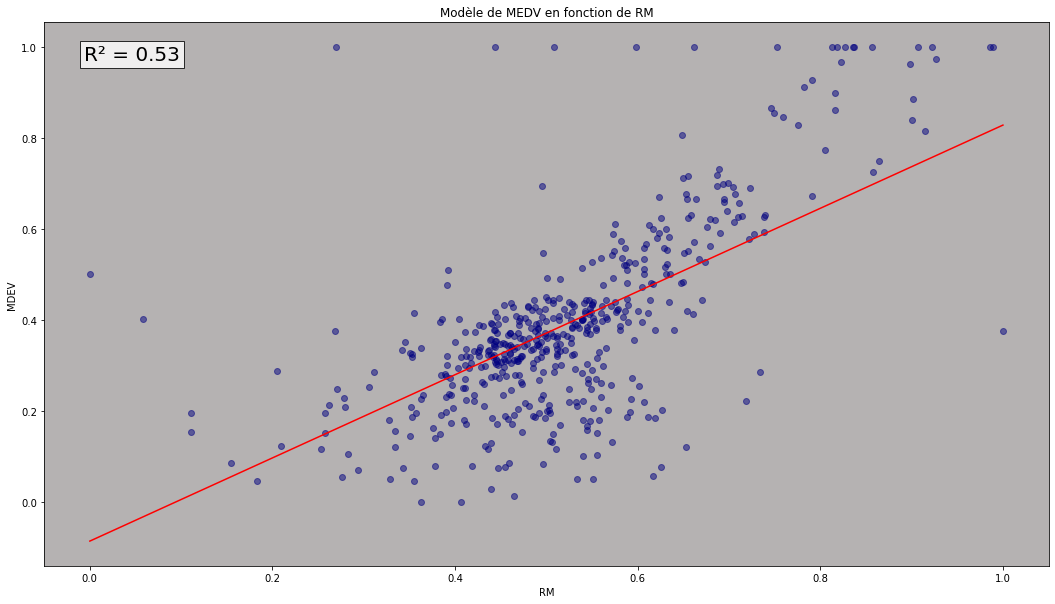

Démarrage du gradient descendant à 
 - b =     0.909 
 - m =     0.878 
 - error = 0.92
Après 2000 epochs: 
 -  b =     0.466 
 -  m =     -0.206 
 -  error = 0.036


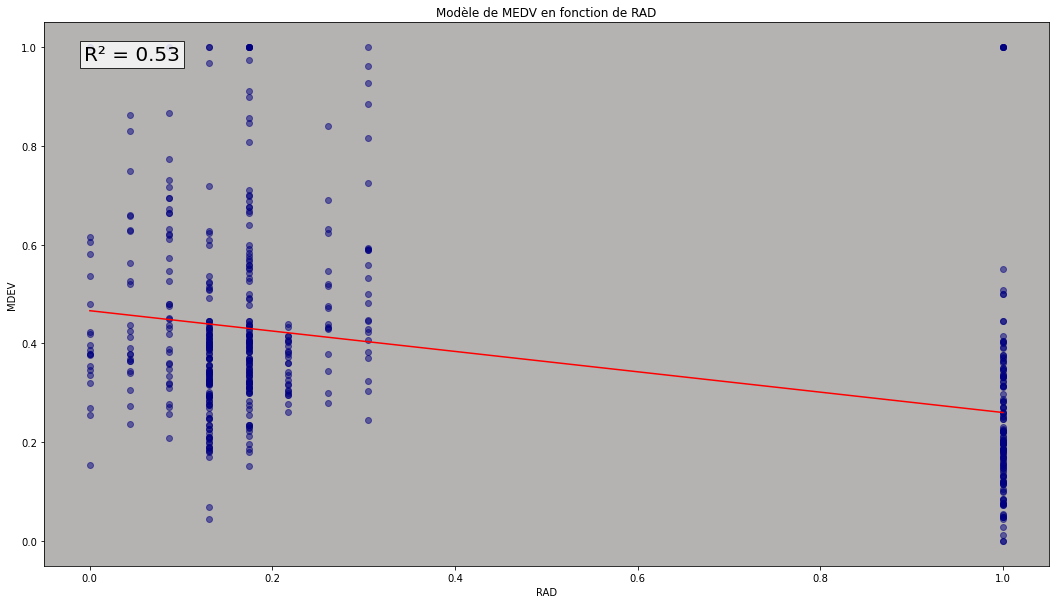

Démarrage du gradient descendant à 
 - b =     0.909 
 - m =     0.878 
 - error = 0.739
Après 2000 epochs: 
 -  b =     0.607 
 -  m =     -0.724 
 -  error = 0.019


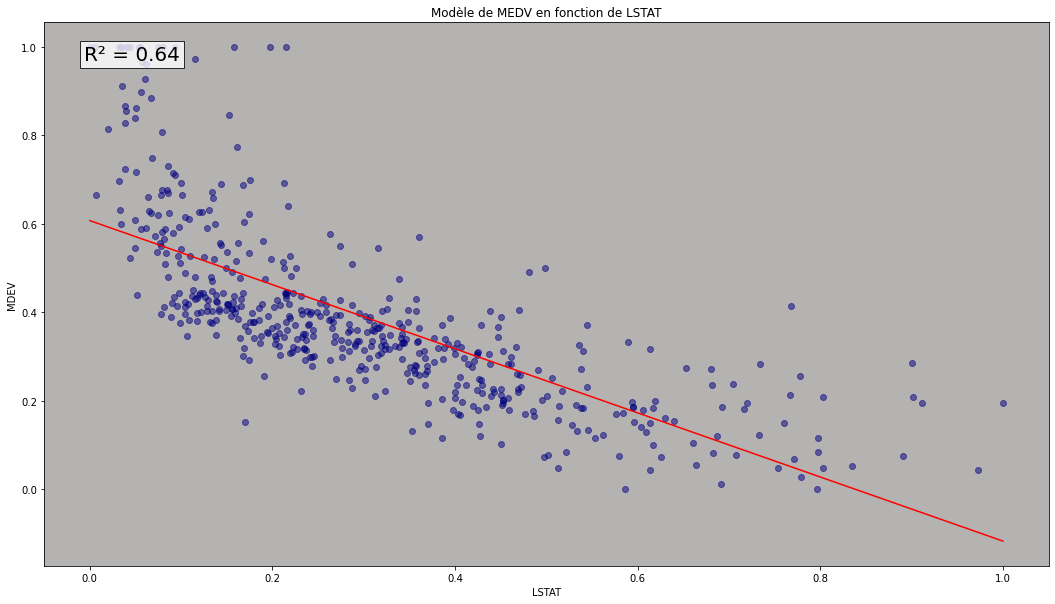

In [12]:
#hyper-paramètre graphique
lrate = 0.05
n_epochs = 2000
#hyper-paramètre R²
rlrate = lrate
rn_epochs = n_epochs
N = 100
#On initialise la valeur de m et de b
initial_b = np.random.rand(1)  # intercept
initial_m = np.random.rand(1)  # pente
for col in ['RM', 'RAD', 'LSTAT']:
    # Collecter les données

    data = boston_df[[col, 'MEDV']].values
    scaller = MinMaxScaler()
    scaller.fit(data)
    data = scaller.transform(data)
    # On applique la méthode du gradient descendant
    print("Démarrage du gradient descendant à \n - b =     {0} \n - m =     {1} \n - error = {2}"
          .format(float("{:.3f}".format(min(initial_b))), 
                  float("{:.3f}".format(min(initial_m))), 
                  float("{:.3f}".format(min(compute_MSE(initial_b, initial_m, data))))))
    [b, m] = gradient_descent(data, initial_b, initial_m, lrate, n_epochs)
    [moyenne, meilleur, pire] = calculerPerformance(N, b, m, data)
    print("Après {0} epochs: \n -  b =     {1} \n -  m =     {2} \n -  error = {3}"
          .format(n_epochs, 
                  float("{:.3f}".format(min(b))), 
                  float("{:.3f}".format(min(m))), 
                  float("{:.3f}".format(min(compute_MSE(b, m, data))))))
    # Plot du graphique
    x = np.linspace(min(data[:, 0]), max(data[:, 0]))
    myTitle = 'Modèle de MEDV en fonction de ' + str(col)
    myXlabel = col
    myYlabel = 'MDEV'
    plot_scatter(data[:, 0], data[:, 1],x, (m*x + b) , myTitle, myXlabel, myYlabel,round(moyenne, 2))

##### Analyse de l'algorithme de régression linéaire: 

En reprenant les valeurs trouvées plus haut, la droite semble plus cohérente avec les données et le R².

Pour le modèle permettant de déterminer MEDV en fonction de:

- RM: la droite ne représente pas encore parfaitement la forme générale représentée par les points, ce qui indique que le modèle n'est pas parfait. Le R² moyen vaut ~0.53, on pourrait encore surement augmenter cette valeur.
- RAD: il est difficile de représenter un modèle concret, car ni la droite estimée ni une quelconque courbe ne suit la forme générale représentée par les points. La moyenne de R² reste correcte avec ~0.53. 
- LSTAT: malgré le fait que les points représentent plus une courbe qu'à une droite, le modèle suit la majorité des points. La moyenne de R² est de ~0.64, ce qui est pas mal en tenant compte que la représetation ressemble a une courbe. C'est donc le meilleur modèle des trois.


## Exercie 2

### Régression linéaire multiple

#### Exercice 2.1 / 2.2)

<AxesSubplot:>

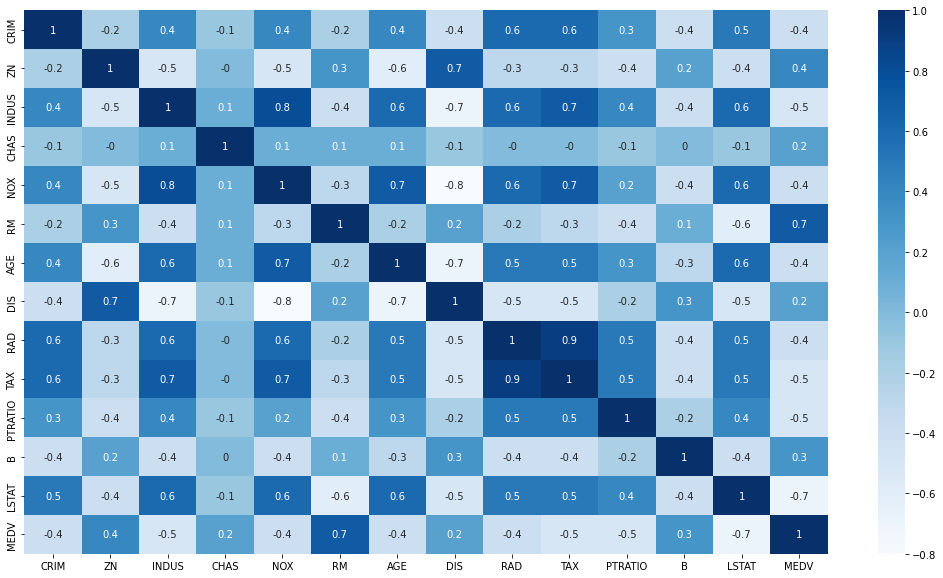

In [13]:
fig, ax = plt.subplots(figsize=(18,10)) 
matrice_corr = boston_df.corr().round(1)
sn.heatmap(data=matrice_corr, annot=True, cmap="Blues", ax=ax)

Comme on peut le remarquer, les variables RM et LSTAT sont les plus correlées avec MEDV ce qui pourrait annoncer une meilleure régression. On va tout de même chercher à faire l'expérience avec d'autres variables pour vérifier si la corrélation était bonne et pour trouver le meilleur modèle.
Pour la sélection des variables, on essayera de prendre les variables les plus correlées manuellement.

In [14]:
couple_of_variables = [["RM", "LSTAT"], ["INDUS", "PTRATIO"], ["CRIM", "TAX"], ["RM", "INDUS"], ["LSTAT", "PTRATIO"]]

#https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/
#https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python
for couple in couple_of_variables:
    calculate_metrics(couple, 100)

Variables : RM et LSTAT --> MEDV
Score R² : 0.63
coefficient des variables : RM = 5.07 LSTAT = -0.64
Ordonnée à l'origine : -1.14
Équation finale : y = ( 5.07 * RM ) + ( -0.64 * LSTAT ) + ( -1.14 )

Variables : INDUS et PTRATIO --> MEDV
Score R² : 0.34
coefficient des variables : INDUS = -0.46 PTRATIO = -1.61
Ordonnée à l'origine : 57.36
Équation finale : y = ( -0.46 * INDUS ) + ( -1.61 * PTRATIO ) + ( 57.36 )

Variables : CRIM et TAX --> MEDV
Score R² : 0.23
coefficient des variables : CRIM = -0.19 TAX = -0.02
Ordonnée à l'origine : 31.4
Équation finale : y = ( -0.19 * CRIM ) + ( -0.02 * TAX ) + ( 31.4 )

Variables : RM et INDUS --> MEDV
Score R² : 0.5
coefficient des variables : RM = 7.9 INDUS = -0.33
Ordonnée à l'origine : -23.41
Équation finale : y = ( 7.9 * RM ) + ( -0.33 * INDUS ) + ( -23.41 )

Variables : LSTAT et PTRATIO --> MEDV
Score R² : 0.59
coefficient des variables : LSTAT = -0.82 PTRATIO = -1.14
Ordonnée à l'origine : 54.02
Équation finale : y = ( -0.82 * LSTAT ) + ( -1.

#### Exercice 2.3)

D'après les résultats obtenus ci-dessus, on remarque qu'à chaque fois qu'un des deux variables RM ou LSTAT est présente dans la combinaison, alors on obtient de très bons résultats. Ce n'est donc pas étonnant que le cas où les deux sont présentes soit le meilleur cas.
On peut aussi dire que ce que l'on voyait sur la matrice de corrélation était donc plutôt correct, c'est en effet les deux variables avec les corrélations les plus hautes qui donnent les meilleurs résultats.
On utilisera alors pour le scatter-plot final les deux variables qui étaient proposées dans l'énoncé qui étaient RM et LSTAT.

#### Exercice 2.4)

Variables : RM et LSTAT --> MEDV
Score R² : 0.62
coefficient des variables : RM = 5.12 LSTAT = -0.64
Ordonnée à l'origine : -1.5
Équation finale : y = ( 5.12 * RM ) + ( -0.64 * LSTAT ) + ( -1.5 )



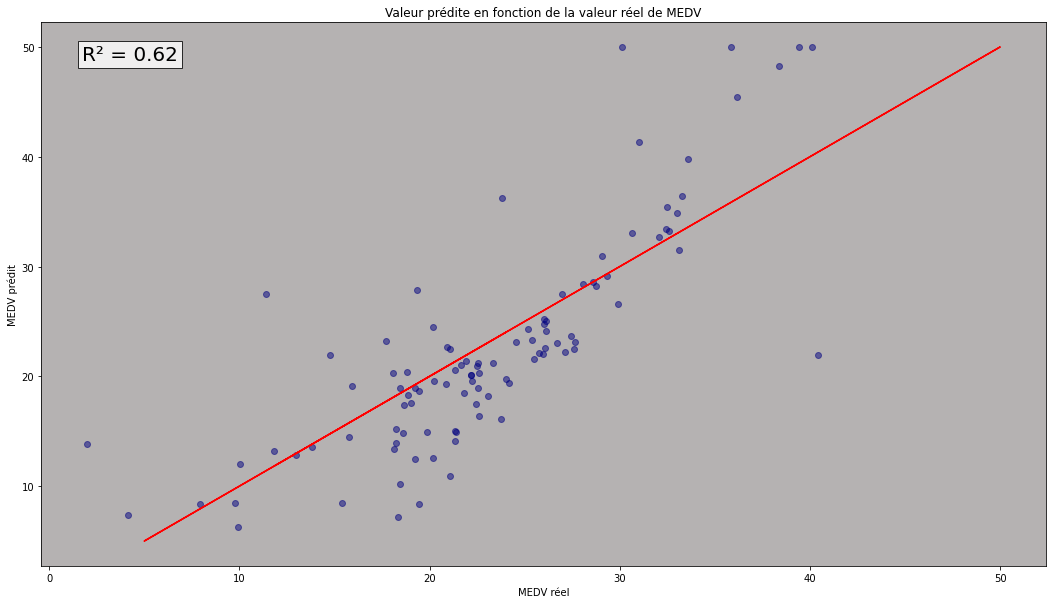

In [15]:
y, y_test, y_pred, score = calculate_metrics(["RM", "LSTAT"], N)
plot_scatter(y_pred, y_test, y,y , 'Valeur prédite en fonction de la valeur réel de MEDV', "MEDV réel", 'MEDV prédit', score)